In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

%config InlineBackend.figure_formats=['svg']

----
$\hbar = 1$

---

# Two Level System
$$H = \frac{\omega_a}{2} \sigma_z$$
where the transition energy between the states is $\omega_a$.

In [8]:
# operators
sx = sigmax() #Pauli-x
sz = sigmaz() #Pauli-z

wa = 2 * np.pi * 1
H0 = wa/2 * -sz

## Driving a Two-level System(TLS)

In [33]:
def drive_coeff(t, args):
    return args["A"] * np.cos(args["wd"] * t)

In [36]:
# Initial State
psi0 = basis(2, 0)

t = np.linspace(0, 50, 5000)

proj_1 = basis(2, 1) * basis(2, 1).dag()

H = [H0, [sx, drive_coeff]] # Hamiltonian in Lab frame
result1 = sesolve(H, psi0, t, e_ops=[proj_1], args={"A":0.3, "wd":wa}) 

H = (wd - wa)/2 * sz +  Omega_d/2 * sx # Hamiltonian in the Rotating Frame
result2 = sesolve(H, psi0, t, e_ops=[proj_1], args={"A":0.3, "wd":wa})

# Rabi Oscillation

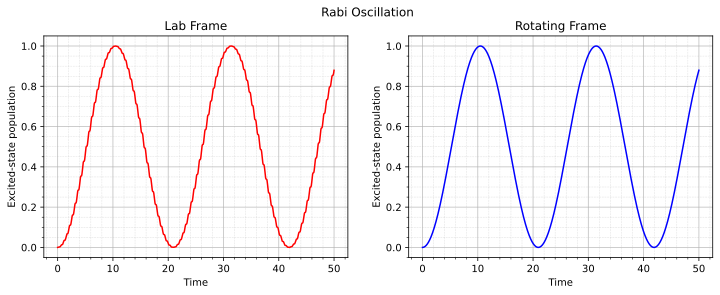

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(t, result1.expect[0], 'r')
ax[1].plot(t, result2.expect[0], 'b')
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Excited-state population")
ax[0].set_title('Lab Frame')
ax[0].minorticks_on()
ax[0].grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.8)
ax[0].grid(True, which='minor', linestyle='--', linewidth=0.5, alpha=0.4)

ax[1].set_title('Rotating Frame')
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Excited-state population")
ax[1].minorticks_on()
ax[1].grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.8)
ax[1].grid(True, which='minor', linestyle='--', linewidth=0.5, alpha=0.4)
fig.suptitle('Rabi Oscillation')
plt.show()